
Results for lambda = 0.001
Newton's Method final value: 2.5479153185165004
BFGS Method final value: 2.5479153185165004

Results for lambda = 0.01
Newton's Method final value: 2.5524607068100487
BFGS Method final value: 2.5524607068100487

Results for lambda = 0.1
Newton's Method final value: 2.596578591957419
BFGS Method final value: 2.596578591957419


<ipython-input-1-4338c5bdb5bf>:61: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(errors), label=label)
<ipython-input-1-4338c5bdb5bf>:69: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(values), label=label)



Results for lambda = 1
Newton's Method final value: 2.9421255782176687
BFGS Method final value: 2.9421255782176687


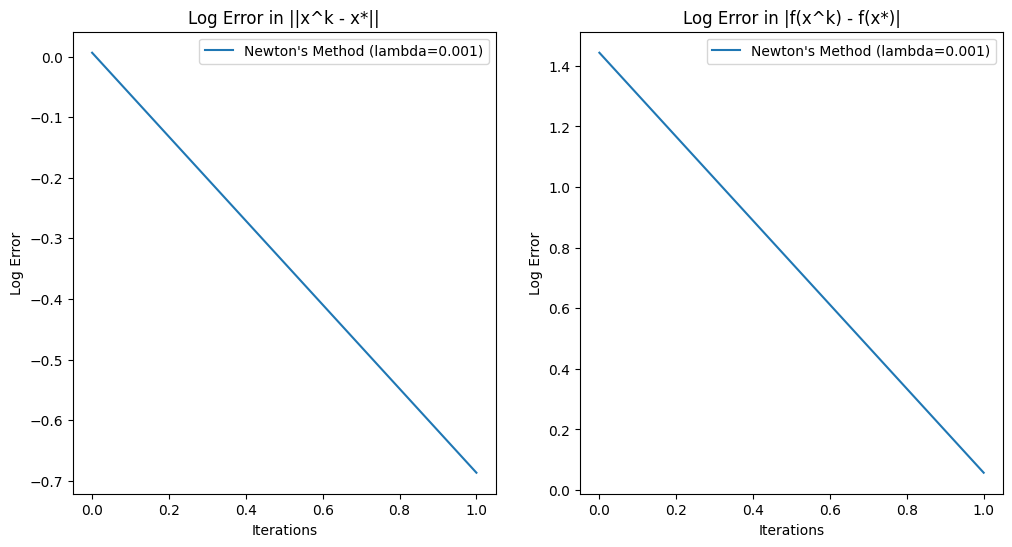

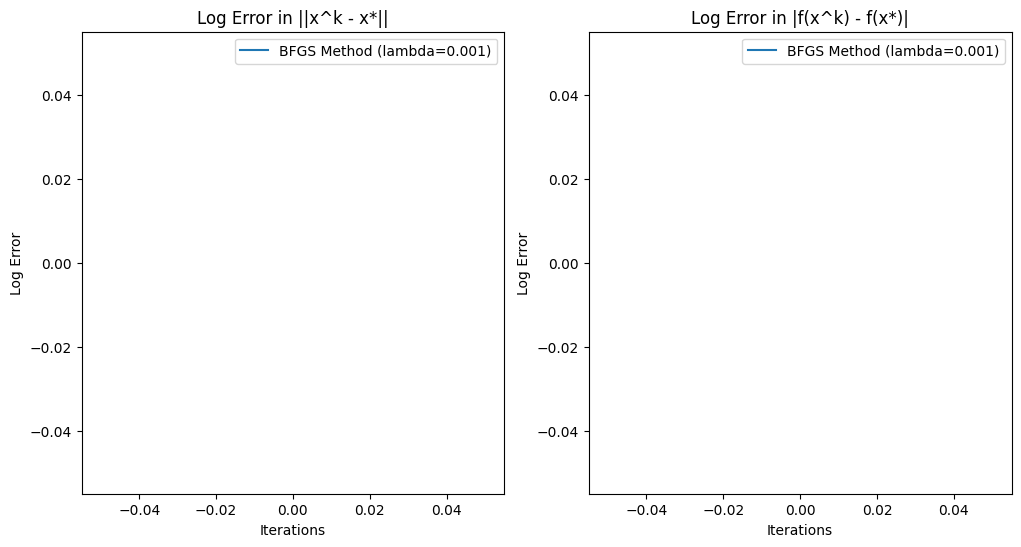

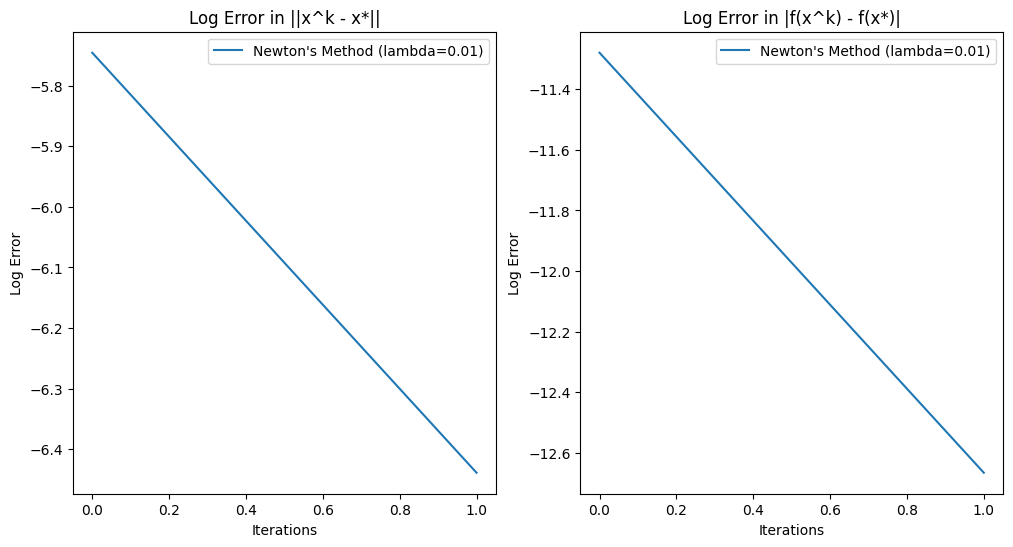

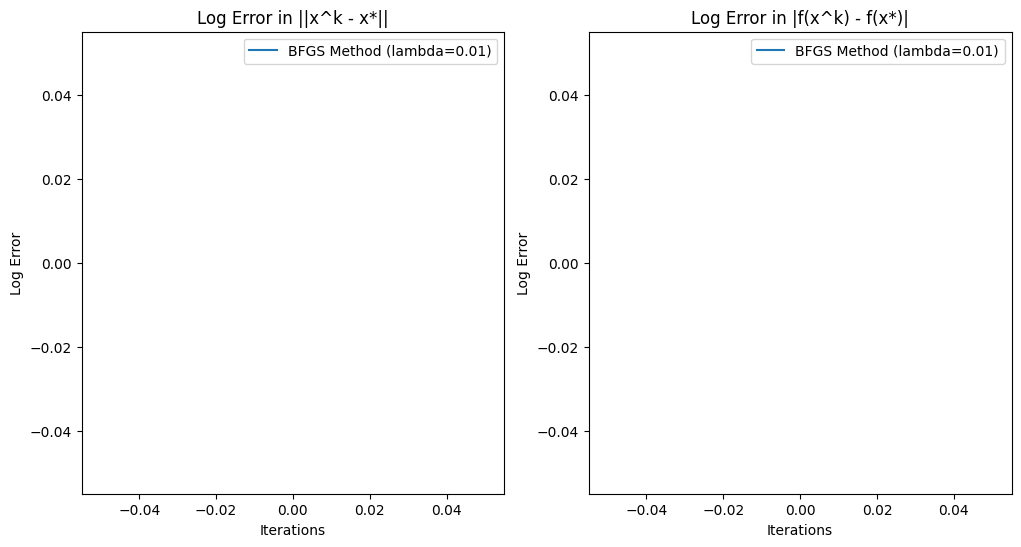

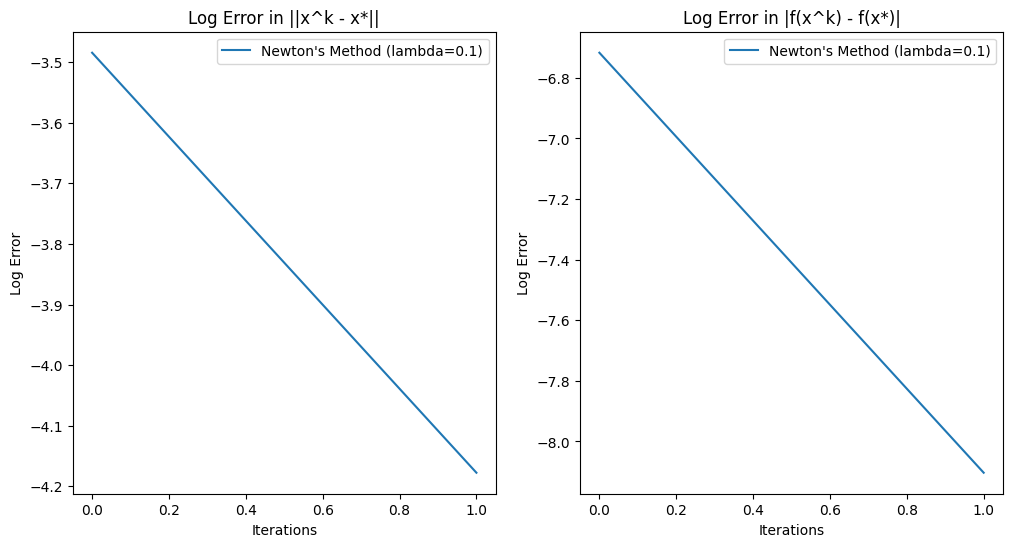

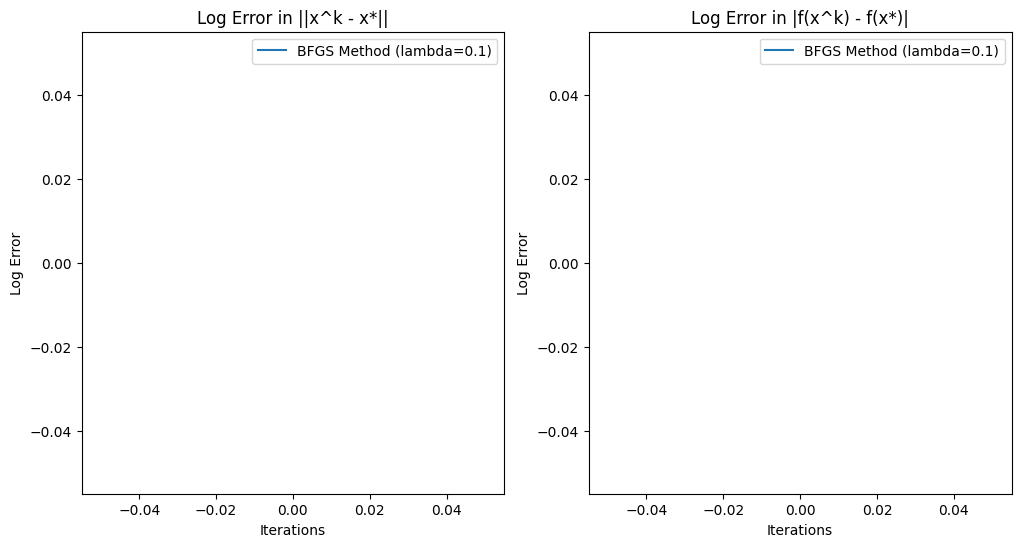

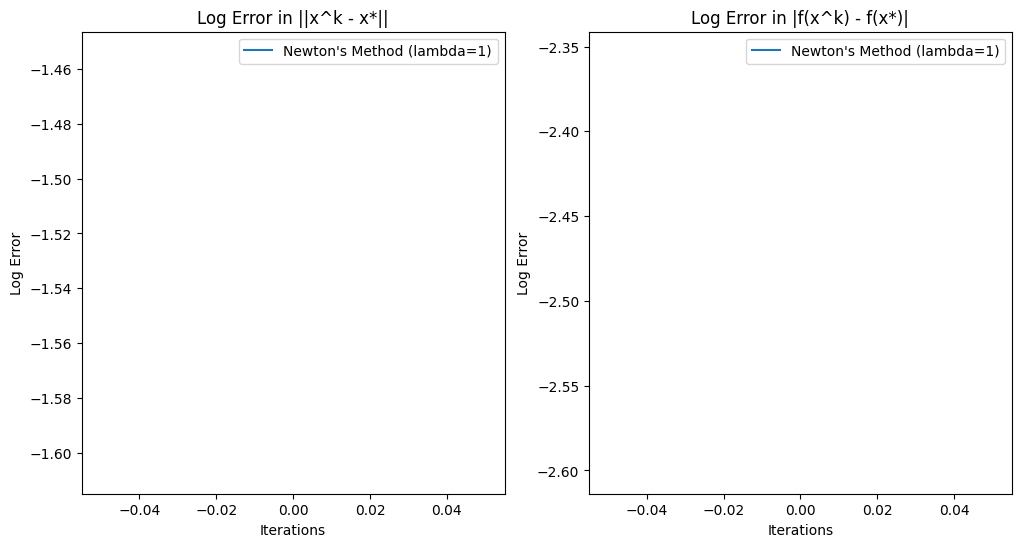

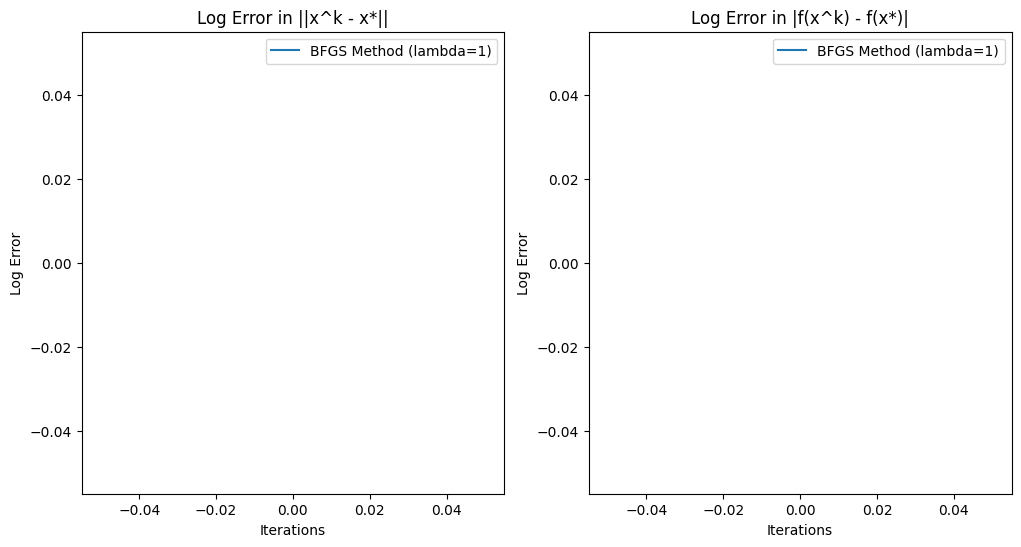

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the value, gradient, and Hessian of f_lambda
def f_lambda(x, A, y, lambd):
    value = (lambd / 2) * np.dot(x, x) + 0.5 * np.linalg.norm(A @ x - y) ** 2
    gradient = lambd * x + A.T @ (A @ x - y)
    hessian = lambd * np.eye(len(x)) + A.T @ A
    return value, gradient, hessian

# Backtracking line search
def backtracking_line_search(x, grad, direction, f_lambda, A, y, lambd, alpha=0.99, rho=0.5, gamma=0.5):
    t = 1
    while f_lambda(x + t * direction, A, y, lambd)[0] > f_lambda(x, A, y, lambd)[0] + gamma * t * grad.dot(direction):
        t *= rho
    return t

# Newton's Method
def newton_method(A, y, lambd, x0, tau=1e-5, max_iter=100):
    x = x0
    history = []
    for _ in range(max_iter):
        value, gradient, hessian = f_lambda(x, A, y, lambd)
        history.append((x.copy(), value))
        if np.linalg.norm(gradient) < tau:
            break
        direction = -np.linalg.solve(hessian, gradient)
        t = backtracking_line_search(x, gradient, direction, f_lambda, A, y, lambd)
        x += t * direction
    return x, history

# BFGS Method
def bfgs_method(A, y, lambd, x0, tau=1e-5, max_iter=100):
    x = x0
    n = len(x0)
    B = np.eye(n)
    history = []
    for _ in range(max_iter):
        value, gradient, _ = f_lambda(x, A, y, lambd)
        history.append((x.copy(), value))
        if np.linalg.norm(gradient) < tau:
            break
        direction = -np.linalg.solve(B, gradient)
        t = backtracking_line_search(x, gradient, direction, f_lambda, A, y, lambd)
        s = t * direction
        x_new = x + s
        gradient_new = f_lambda(x_new, A, y, lambd)[1]
        y_vec = gradient_new - gradient
        B += np.outer(y_vec, y_vec) / y_vec.dot(s) - B @ np.outer(s, s) @ B / s.dot(B @ s)
        x = x_new
    return x, history

# Plotting results
def plot_results(history, label):
    errors = [np.linalg.norm(x - history[-1][0]) for x, _ in history]
    values = [abs(f - history[-1][1]) for _, f in history]
    plt.figure(figsize=(12, 6))

    # Plot log error in ||x^k - x*||
    plt.subplot(1, 2, 1)
    plt.plot(np.log(errors), label=label)
    plt.title("Log Error in ||x^k - x*||")
    plt.xlabel("Iterations")
    plt.ylabel("Log Error")
    plt.legend()

    # Plot log error in |f(x^k) - f(x*)|
    plt.subplot(1, 2, 2)
    plt.plot(np.log(values), label=label)
    plt.title("Log Error in |f(x^k) - f(x*)|")
    plt.xlabel("Iterations")
    plt.ylabel("Log Error")
    plt.legend()

# Main function
if __name__ == "__main__":
    # Problem setup
    np.random.seed(0)
    n, m = 10, 20
    A = np.random.randn(m, n)
    y = np.random.randn(m)
    lambdas = [1e-3, 1e-2, 1e-1, 1]
    x0 = np.zeros(n)

    for lambd in lambdas:
        print(f"\nResults for lambda = {lambd}")

        # Newton's Method
        x_newton, history_newton = newton_method(A, y, lambd, x0)
        print(f"Newton's Method final value: {history_newton[-1][1]}")
        plot_results(history_newton, label=f"Newton's Method (lambda={lambd})")

        # BFGS Method
        x_bfgs, history_bfgs = bfgs_method(A, y, lambd, x0)
        print(f"BFGS Method final value: {history_bfgs[-1][1]}")
        plot_results(history_bfgs, label=f"BFGS Method (lambda={lambd})")

    plt.show()


In [ ]:
#Qn4)
    def plot_newton_results(history, lambd):
    iterations = range(len(history))
    x_star = history[-1][0]
    f_star = history[-1][1]

    # Log error in ||x^k - x*||
    errors_x = [np.log(np.linalg.norm(x - x_star)) for x, _ in history]
    plt.plot(iterations, errors_x, label=f"Newton's Method λ={lambd} ||x^k - x*||")

    # Log error in |f(x^k) - f(x*)|
    errors_f = [np.log(abs(f - f_star)) for _, f in history]
    plt.plot(iterations, errors_f, label=f"Newton's Method λ={lambd} |f(x^k) - f(x*)|")


In [ ]:
#qn5)
    def plot_bfgs_results(history, lambd):
    iterations = range(len(history))
    x_star = history[-1][0]
    f_star = history[-1][1]

    # Log error in ||x^k - x*||
    errors_x = [np.log(np.linalg.norm(x - x_star)) for x, _ in history]
    plt.plot(iterations, errors_x, label=f"BFGS Method λ={lambd} ||x^k - x*||")

    # Log error in |f(x^k) - f(x*)|
    errors_f = [np.log(abs(f - f_star)) for _, f in history]
    plt.plot(iterations, errors_f, label=f"BFGS Method λ={lambd} |f(x^k) - f(x*)|")



Comparison for λ=0.001:
Newton's Method time: 0.0004s, Final value: 2.5479153185165004
BFGS Method time: 0.0001s, Final value: 2.5479153185165004


<ipython-input-2-8081ab7d9ba5>:7: RuntimeWarning: divide by zero encountered in log
  errors_x = [np.log(np.linalg.norm(x - x_star)) for x, _ in history]
<ipython-input-2-8081ab7d9ba5>:11: RuntimeWarning: divide by zero encountered in log
  errors_f = [np.log(abs(f - f_star)) for _, f in history]


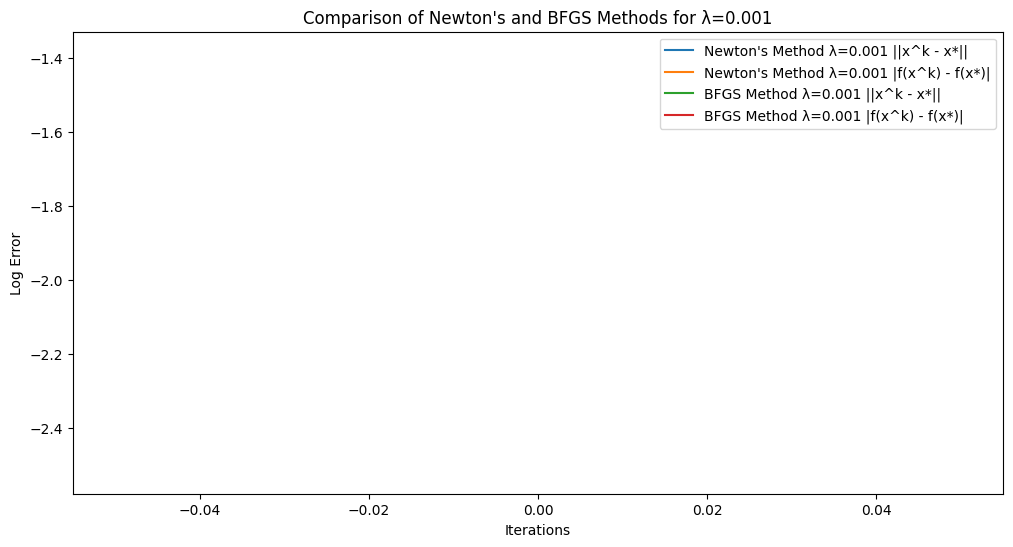


Comparison for λ=0.01:
Newton's Method time: 0.0012s, Final value: 2.5524607068100487
BFGS Method time: 0.0002s, Final value: 2.5524607068100487


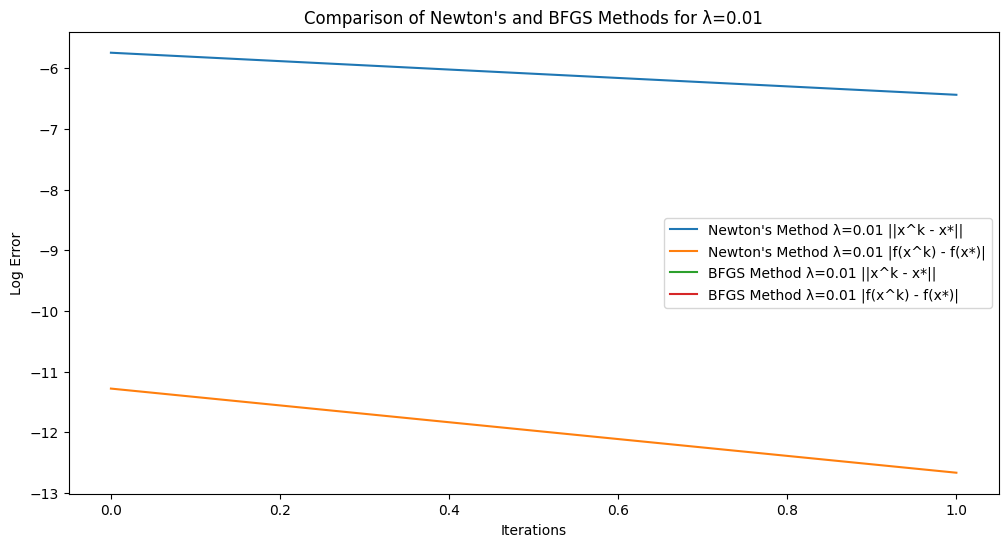


Comparison for λ=0.1:
Newton's Method time: 0.0009s, Final value: 2.596578591957419
BFGS Method time: 0.0001s, Final value: 2.596578591957419


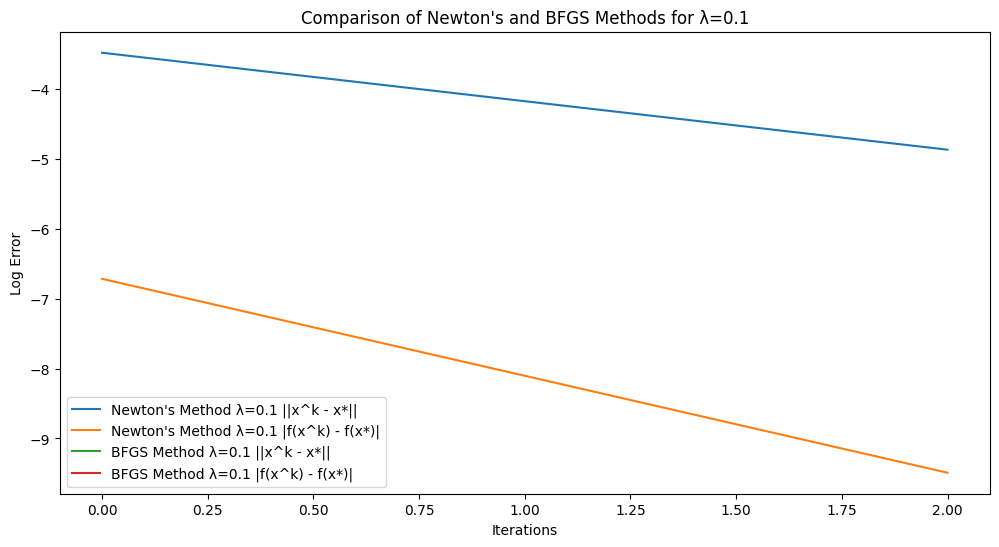


Comparison for λ=1:
Newton's Method time: 0.0005s, Final value: 2.9421255782176687
BFGS Method time: 0.0002s, Final value: 2.9421255782176687


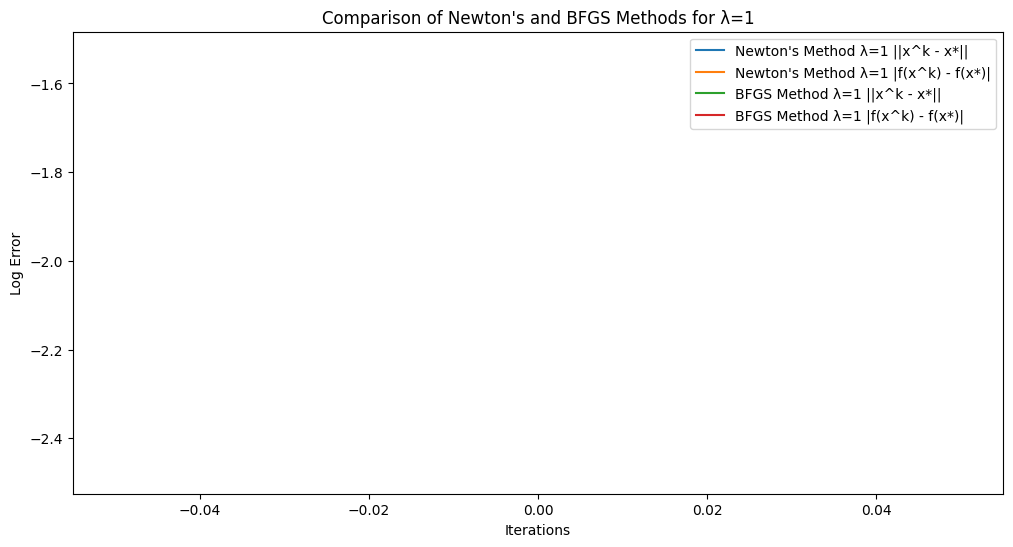

In [ ]:
import time

def compare_methods(A, y, lambdas, x0):
    for lambd in lambdas:
        print(f"\nComparison for λ={lambd}:")

        # Measure Newton's Method
        start_time = time.time()
        _, history_newton = newton_method(A, y, lambd, x0)
        newton_time = time.time() - start_time
        print(f"Newton's Method time: {newton_time:.4f}s, Final value: {history_newton[-1][1]}")

        # Measure BFGS Method
        start_time = time.time()
        _, history_bfgs = bfgs_method(A, y, lambd, x0)
        bfgs_time = time.time() - start_time
        print(f"BFGS Method time: {bfgs_time:.4f}s, Final value: {history_bfgs[-1][1]}")

        # Plot results
        plt.figure(figsize=(12, 6))
        plot_newton_results(history_newton, lambd)
        plot_bfgs_results(history_bfgs, lambd)
        plt.xlabel("Iterations")
        plt.ylabel("Log Error")
        plt.title(f"Comparison of Newton's and BFGS Methods for λ={lambd}")
        plt.legend()
        plt.show()

# Run comparisons
compare_methods(A, y, lambdas, x0)



Comparison for λ=0.001:
Newton's Method time: 0.0007s, Final value: 2.5479153185165004
BFGS Method time: 0.0001s, Final value: 2.5479153185165004


<ipython-input-8-f68744cadd20>:61: RuntimeWarning: divide by zero encountered in log
  errors_x = [np.log(np.linalg.norm(x - x_star)) for x, _ in history]
<ipython-input-8-f68744cadd20>:65: RuntimeWarning: divide by zero encountered in log
  errors_f = [np.log(abs(f - f_star)) for _, f in history]
<ipython-input-8-f68744cadd20>:75: RuntimeWarning: divide by zero encountered in log
  errors_x = [np.log(np.linalg.norm(x - x_star)) for x, _ in history]
<ipython-input-8-f68744cadd20>:79: RuntimeWarning: divide by zero encountered in log
  errors_f = [np.log(abs(f - f_star)) for _, f in history]


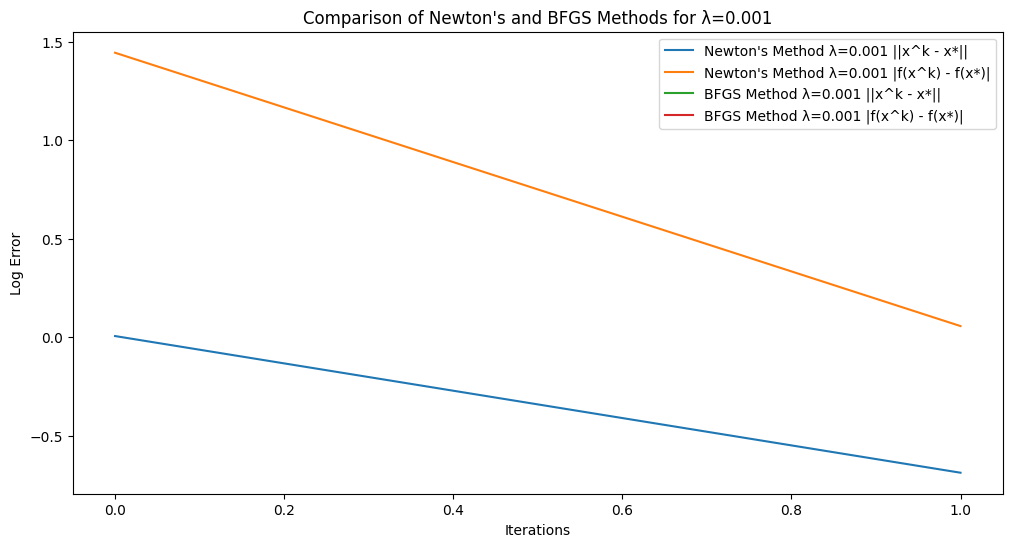


Comparison for λ=0.01:
Newton's Method time: 0.0008s, Final value: 2.5524607068100487
BFGS Method time: 0.0001s, Final value: 2.5524607068100487


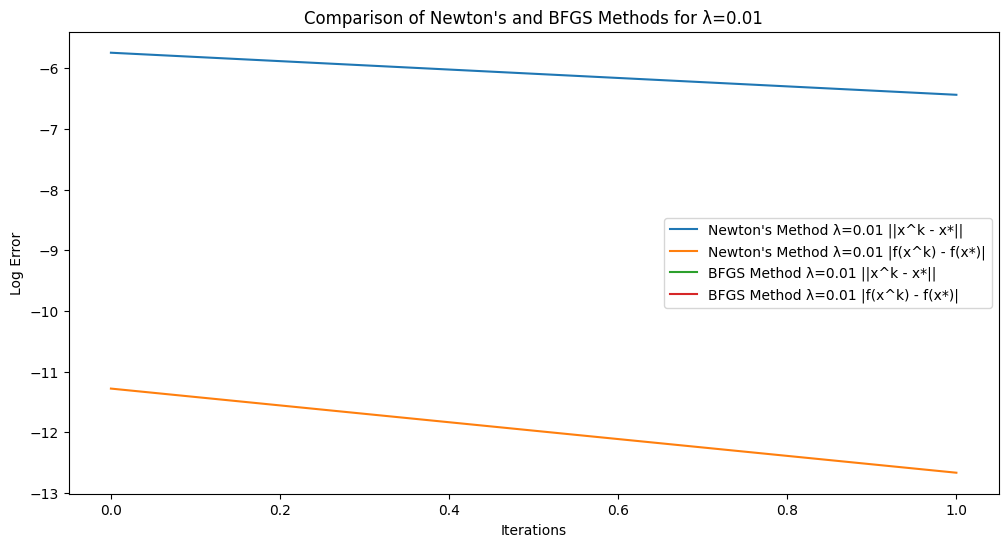


Comparison for λ=0.1:
Newton's Method time: 0.0007s, Final value: 2.596578591957419
BFGS Method time: 0.0001s, Final value: 2.596578591957419


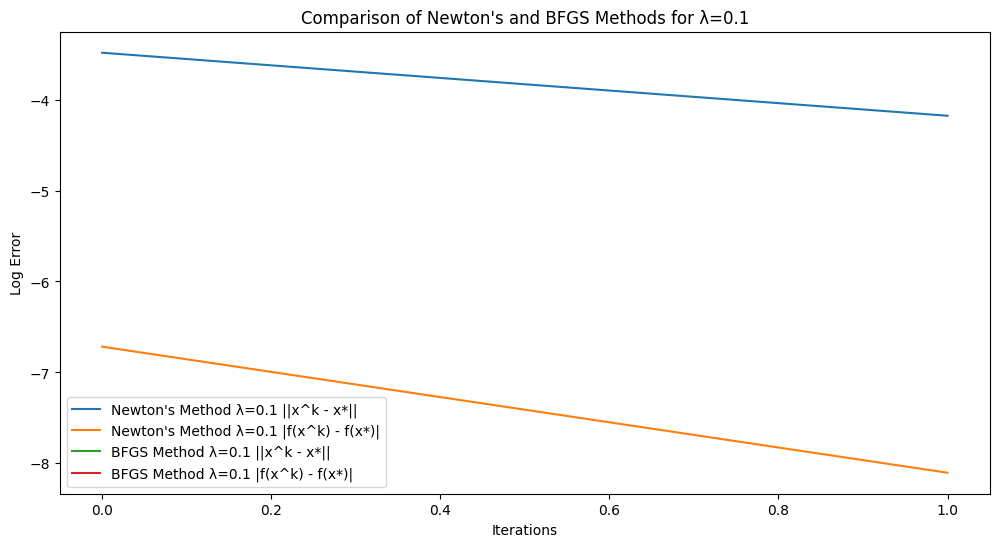


Comparison for λ=1:
Newton's Method time: 0.0005s, Final value: 2.9421255782176687
BFGS Method time: 0.0001s, Final value: 2.9421255782176687


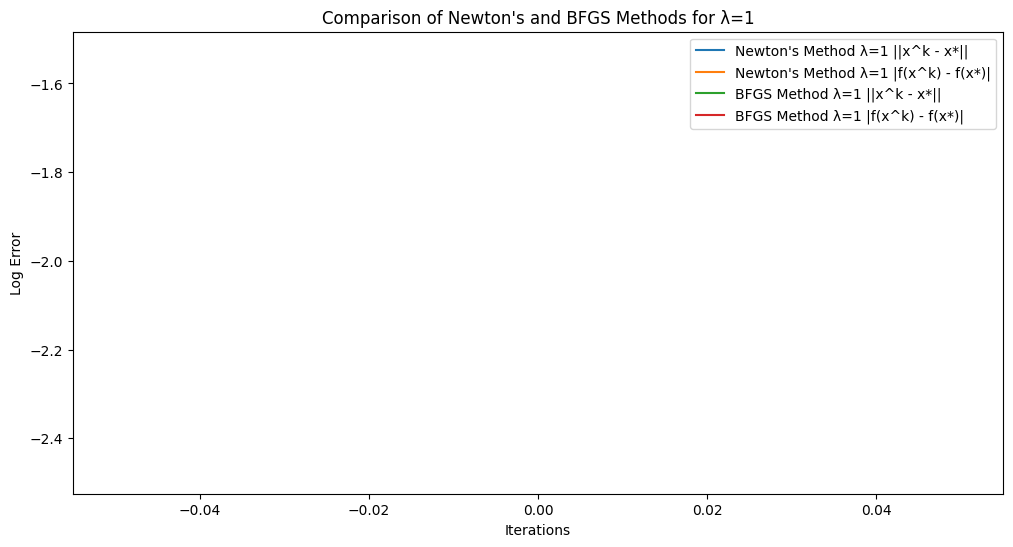

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to compute the value, gradient, and Hessian of f_lambda
def f_lambda(x, A, y, lambd):
    value = (lambd / 2) * np.dot(x, x) + 0.5 * np.linalg.norm(A @ x - y) ** 2
    gradient = lambd * x + A.T @ (A @ x - y)
    hessian = lambd * np.eye(len(x)) + A.T @ A
    return value, gradient, hessian

# Backtracking line search
def backtracking_line_search(x, grad, direction, f_lambda, A, y, lambd, alpha=0.99, rho=0.5, gamma=0.5):
    t = 1
    while f_lambda(x + t * direction, A, y, lambd)[0] > f_lambda(x, A, y, lambd)[0] + gamma * t * grad.dot(direction):
        t *= rho
    return t

# Newton's Method
def newton_method(A, y, lambd, x0, tau=1e-5, max_iter=100):
    x = x0
    history = []
    for _ in range(max_iter):
        value, gradient, hessian = f_lambda(x, A, y, lambd)
        history.append((x.copy(), value))
        if np.linalg.norm(gradient) < tau:
            break
        direction = -np.linalg.solve(hessian, gradient)
        t = backtracking_line_search(x, gradient, direction, f_lambda, A, y, lambd)
        x += t * direction
    return x, history

# BFGS Method
def bfgs_method(A, y, lambd, x0, tau=1e-5, max_iter=100):
    x = x0
    n = len(x0)
    B = np.eye(n)
    history = []
    for _ in range(max_iter):
        value, gradient, _ = f_lambda(x, A, y, lambd)
        history.append((x.copy(), value))
        if np.linalg.norm(gradient) < tau:
            break
        direction = -np.linalg.solve(B, gradient)
        t = backtracking_line_search(x, gradient, direction, f_lambda, A, y, lambd)
        s = t * direction
        x_new = x + s
        gradient_new = f_lambda(x_new, A, y, lambd)[1]
        y_vec = gradient_new - gradient
        B += np.outer(y_vec, y_vec) / y_vec.dot(s) - B @ np.outer(s, s) @ B / s.dot(B @ s)
        x = x_new
    return x, history

# Plotting results for Newton's Method
def plot_newton_results(history, lambd):
    iterations = range(len(history))
    x_star = history[-1][0]
    f_star = history[-1][1]

    # Log error in ||x^k - x*||
    errors_x = [np.log(np.linalg.norm(x - x_star)) for x, _ in history]
    plt.plot(iterations, errors_x, label=f"Newton's Method λ={lambd} ||x^k - x*||")

    # Log error in |f(x^k) - f(x*)|
    errors_f = [np.log(abs(f - f_star)) for _, f in history]
    plt.plot(iterations, errors_f, label=f"Newton's Method λ={lambd} |f(x^k) - f(x*)|")

# Plotting results for BFGS Method
def plot_bfgs_results(history, lambd):
    iterations = range(len(history))
    x_star = history[-1][0]
    f_star = history[-1][1]

    # Log error in ||x^k - x*||
    errors_x = [np.log(np.linalg.norm(x - x_star)) for x, _ in history]
    plt.plot(iterations, errors_x, label=f"BFGS Method λ={lambd} ||x^k - x*||")

    # Log error in |f(x^k) - f(x*)|
    errors_f = [np.log(abs(f - f_star)) for _, f in history]
    plt.plot(iterations, errors_f, label=f"BFGS Method λ={lambd} |f(x^k) - f(x*)|")

# Compare methods
def compare_methods(A, y, lambdas, x0):
    for lambd in lambdas:
        print(f"\nComparison for λ={lambd}:")

        # Measure Newton's Method
        start_time = time.time()
        _, history_newton = newton_method(A, y, lambd, x0)
        newton_time = time.time() - start_time
        print(f"Newton's Method time: {newton_time:.4f}s, Final value: {history_newton[-1][1]}")

        # Measure BFGS Method
        start_time = time.time()
        _, history_bfgs = bfgs_method(A, y, lambd, x0)
        bfgs_time = time.time() - start_time
        print(f"BFGS Method time: {bfgs_time:.4f}s, Final value: {history_bfgs[-1][1]}")

        # Plot results
        plt.figure(figsize=(12, 6))
        plot_newton_results(history_newton, lambd)
        plot_bfgs_results(history_bfgs, lambd)
        plt.xlabel("Iterations")
        plt.ylabel("Log Error")
        plt.title(f"Comparison of Newton's and BFGS Methods for λ={lambd}")
        plt.legend()
        plt.show()

# Main function
if __name__ == "__main__":
    # Problem setup
    np.random.seed(0)
    n, m = 10, 20
    A = np.random.randn(m, n)
    y = np.random.randn(m)
    lambdas = [1e-3, 1e-2, 1e-1, 1]
    x0 = np.zeros(n)

    # Compare methods
    compare_methods(A, y, lambdas, x0)
